<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [2]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 163.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 155.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 120.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 139.0 MB/s eta 0:00:00


### Step 2: Load the Dataset


In [3]:

file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# İlk birkaç satırı görüntüle
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


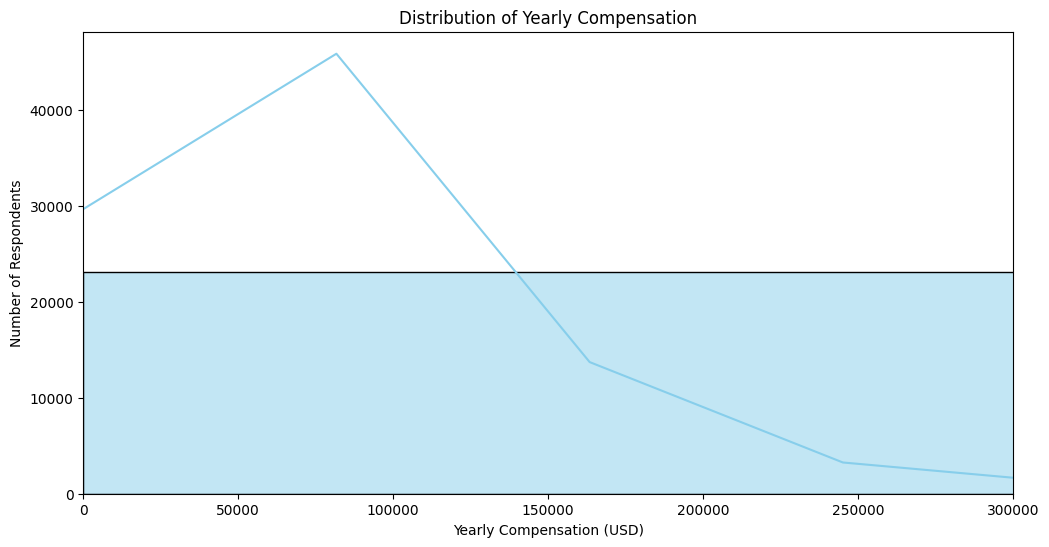

In [22]:


# Histogram ve KDE plot birlikte
plt.figure(figsize=(12,6))
sns.histplot(df['ConvertedCompYearly'].dropna(), bins=50, kde=True, color='skyblue')
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.xlim(0, 300000)  # Çok yüksek uç değerleri görmezden gelmek için opsiyonel
plt.show()


<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [23]:
# Sadece full-time çalışanları filtrele
fulltime_df = df[df['Employment'] == 'Employed, full-time']

# Median yıllık maaşı hesapla
median_fulltime = fulltime_df['ConvertedCompYearly'].median()

print("Median compensation for full-time employees:", median_fulltime)


Median compensation for full-time employees: 69814.0


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



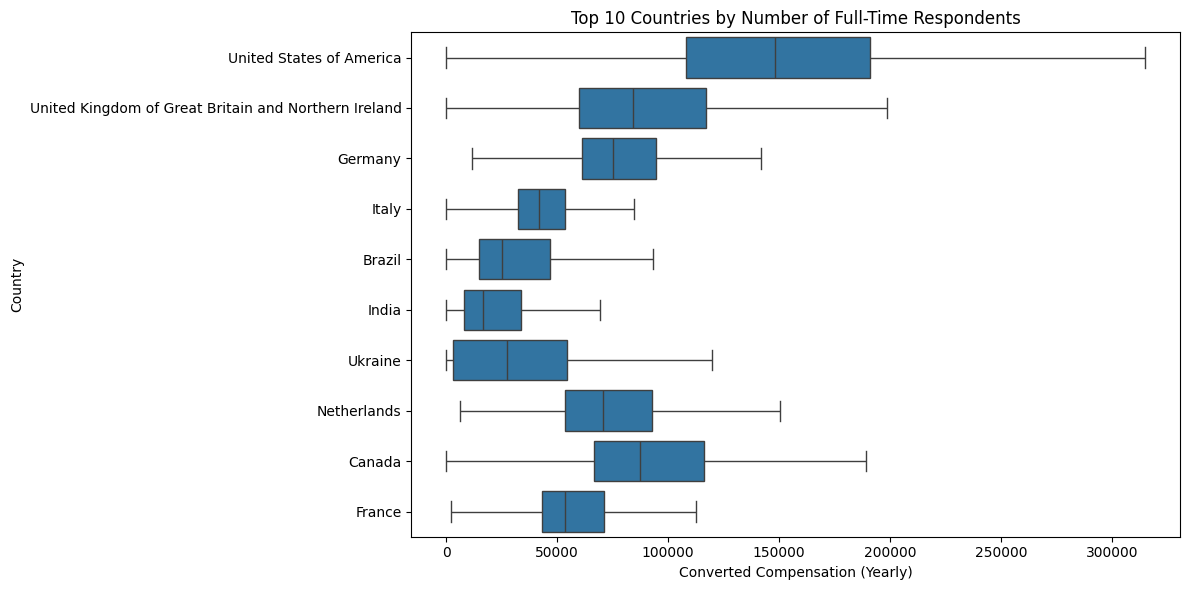

In [25]:
top_countries = fulltime_df['Country'].value_counts().head(10).index
top_df = fulltime_df[fulltime_df['Country'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.boxplot(x='ConvertedCompYearly', y='Country', data=top_df, orient='h', showfliers=False)
plt.title('Top 10 Countries by Number of Full-Time Respondents')
plt.xlabel('Converted Compensation (Yearly)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [26]:
# Full-time çalışanları seçiyoruz
fulltime_df = df[df['Employment'] == 'Employed, full-time'].copy()

# ConvertedCompYearly sütunundaki NaN değerleri çıkar
fulltime_df = fulltime_df[fulltime_df['ConvertedCompYearly'].notna()]

# IQR hesaplama
Q1 = fulltime_df['ConvertedCompYearly'].quantile(0.25)
Q3 = fulltime_df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Alt ve üst sınırlar
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outlier'ları kaldır
clean_df = fulltime_df[(fulltime_df['ConvertedCompYearly'] >= lower_bound) & 
                       (fulltime_df['ConvertedCompYearly'] <= upper_bound)]

# Boyutları kontrol et
print("Orijinal DataFrame boyutu:", fulltime_df.shape)
print("Outlier'lar çıkarıldıktan sonra:", clean_df.shape)


Orijinal DataFrame boyutu: (17586, 114)
Outlier'lar çıkarıldıktan sonra: (16814, 114)


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.154114        0.020306
WorkExp                         0.154114  1.000000       -0.026490
JobSatPoints_1                  0.020306 -0.026490        1.000000


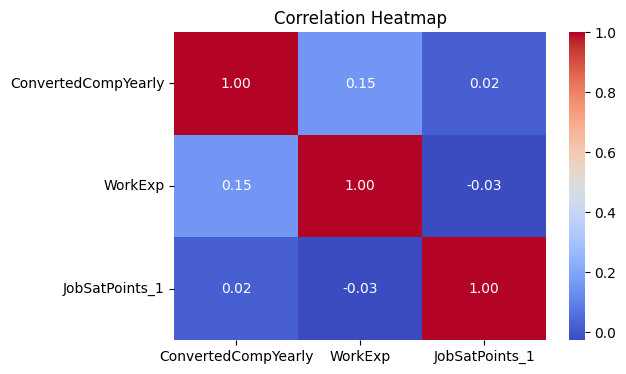

In [4]:
variables = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']

# Calculate correlation matrix
corr_matrix = df[variables].corr()

# Display correlation matrix
print(corr_matrix)

# Visualize with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


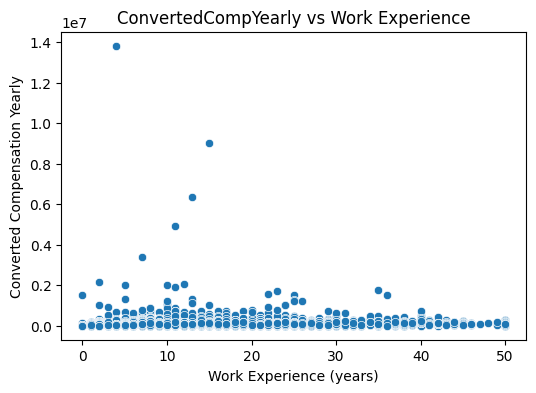

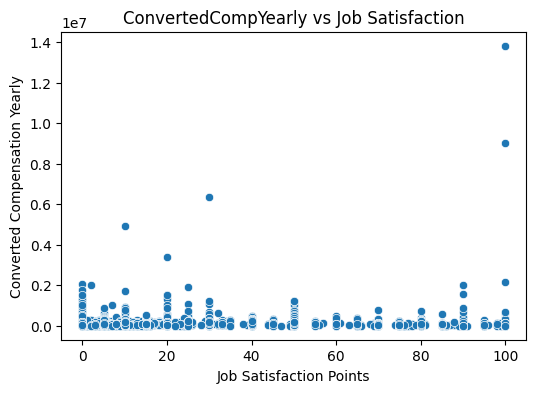

In [5]:

# Scatter plot: ConvertedCompYearly vs WorkExp
plt.figure(figsize=(6,4))
sns.scatterplot(x='WorkExp', y='ConvertedCompYearly', data=df)
plt.title('ConvertedCompYearly vs Work Experience')
plt.xlabel('Work Experience (years)')
plt.ylabel('Converted Compensation Yearly')
plt.show()

# Scatter plot: ConvertedCompYearly vs JobSatPoints_1
plt.figure(figsize=(6,4))
sns.scatterplot(x='JobSatPoints_1', y='ConvertedCompYearly', data=df)
plt.title('ConvertedCompYearly vs Job Satisfaction')
plt.xlabel('Job Satisfaction Points')
plt.ylabel('Converted Compensation Yearly')
plt.show()


<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
